### <p style="text-align: right;"> &#9989; Jacob Jensen

# Day 14 In-Class: Cleaning and Analyzing Economic Data




<img src="http://2oqz471sa19h3vbwa53m33yj-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/world-economy-gdp.jpg" width=500px>

## Goals for today's in-class project

- Review some basic statistics
- Load in data and clean Pandas dataframes
- Learn different ways to index Pandas dataframes 
- Analyze different countries GDP data
- Practice using online research to learn new programming skills


## Assignment instructions

Work with your group to complete this assignment. The assignment is due at the end of class and should be uploaded to the appropriate submission folder on D2L.

### Statistics Review

Today we will start off by reviewing some basic statistical measures.

Mean and Median are used to find the average and the middle value in a set of data. The mean is sensitive to outliers and the median is not because the mean accounts for the sum of all values where the median just is just looking for the middle. 

- Mean (Average) = Sum of observations / Number of observations
    
- Median = Midpoint of a frequency distribution or the middle value when sorted
    
---  
To understand how widely spread a distribution of values is, we look at the variance and the standard deviation:

- Variance: this is the expected value of the squared deviation of a random variable from its average value. You can think of it as a measure of the spread of the dataset. 
    
- Standard Deviation: this is simply the square root of variance. It is a measurement of the variation or dispersion of a set of values.

As we mentioned above, the mean can be sensitive to the existence of outliers. Look at the example below.

**Example of mean sensitivity to outliers:**

In [1]:
import numpy as np

# Create a list where most of the values are within a similar range, but one is a clear outlier
X = [3,2,1,20,4]

print("The mean is:",np.mean(X))
print("The median is:",np.median(X))

The mean is: 6.0
The median is: 3.0


# Practice calculating statistics using Python

### Computing standard deviation by hand

**Create a function** that takes in a list of values and calculates the standard deviation using only basic python functions. You should be able to do it without importing any packages (i.e. no np.std, np.mean etc..)

## $$ \sigma = \sqrt{\frac{\sum\limits_{i=1}^{N} (x_{i}-\mu)^2}{N}} $$

where the symbols in this equation represent the following:

* $\sigma$: Standard Deviation
* $\mu$: Mean
* $N$: Number of observations
* $x_{i}$: the value of dataset at position $i$

In [28]:
# Put your code here
def stdev(xList):
    # Initialize local variables
    s = sum(xList)
    N = len(xList)
    
    # Calculate the mean
    mu = s / N
    
    # Initialize the sum used for SD
    stdSum = 0
    
    # Find the (x - mu)^2 value to use for SD
    for x in xList:
        stdSum += (x-mu)**2 
    
    # Calculate the STD of the list
    stdev = (stdSum / N )**0.5
    
    # Return the SD
    return stdev



**Check your function for accuracy**

Call your function using the variable test_list as the input and compare your functions output with `np.std()` to make sure you calculated standard deviation correctly.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
test_list = [1,3,5,10,15,5]

# Put your code for comparing the answers here

print(stdev(test_list))
print(np.std(test_list))

4.681523968396046
4.681523968396046


Now, review the following distribution. **Without computing anything do you think the mean will be greater than, less than, or equal to the median? Explain why below.**

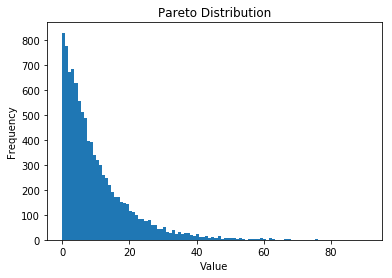

In [31]:
# You might not be familiar this with random number generators, this is one of _many_ that are available in NumPy.
random_distribution = np.random.pareto(100,10000)*1000

# Now we make a histogram of the numbers
hist = plt.hist(random_distribution,bins=100)
ylabel = plt.ylabel("Frequency")
xlabel = plt.xlabel("Value")
title = plt.title("Pareto Distribution")

<font size=20px>&#9998;</font> The mean would be larger than the median. There is a large amount of values under 20 causing the median to lie nearer the lower values of the distribution. However, there exists values that are over 3x the value of 20, causing them to skew the mean towards larger values, making the mean larger than the median.

**Now lets actually compute the mean and median and visualize them on the distribution graph.**

Add two vertical lines with different colors where the mean and median are using Matplotlib's [`plt.axvline()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html) function -- this might be new to you, so make sure you understand how it works!

**Make sure you label your lines and include a legend.**

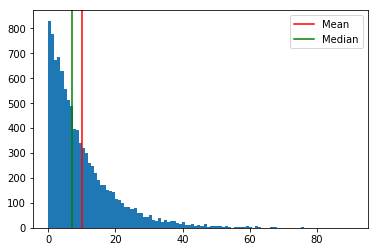

In [58]:
hist = plt.hist(random_distribution,bins=100)
# Add your additional plotting commands here

plt.axvline(random_distribution.mean(), label = 'Mean', color = 'red')
plt.axvline( np.median(random_distribution) , label = 'Median', color = 'green')
plt.legend()
plt.show()

<font size=20px>&#128721;</font>
Check if your answer was correct


**Was your prediction correct? Explain why the mean is greater than median in this example.**

<font size=20px>&#9998;</font> Yes, my prediction was correct as the mean is getting skewed by larger values while the median doesn't care about the actual values of the data, just their position. 

---


# Part 2: Loading in and cleaning economic data

The next part we will focus on transforming and manipulating a dataset using Pandas. As data scientist in training, one of the goals we want you to accomplish is to be comfortable searching through online resources to try and solve problems. There are far too many functions and concepts in programming to remember everything so in practice it's essential to utilize package documentation, stack overflow, etc. Some of the questions you will see below will ask you to use or look for a function you've never used before to get you to practice Googling questions that help you accomplish your task.


---

We will be analyzing a dataset from the World Bank containing yearly GDP data for countries from 1960-2018. The GDP numbers have been converted to USD for all countries by the exchange rate at the time. Which is important to note because depending on the exchange rates at the time this could over/under value the non US countries numbers or increase the variance of GDP.

Link to dataset: https://data.worldbank.org/indicator/ny.gdp.mktp.cd

GDP stands for **Gross Domestic Product** and it is equal to the market value of all the finished goods and services produced within a country's borders in a specific time period.

GDP = Consumer Spending + Private Investment + Government Expenditure + Net Exports

---

Cleaning data is an important part of any data analyst job. Load in the GDP.csv dataset into a Pandas Dataframe by using read_csv() and explore the original structure of the data and think about if it could be formatted in a more useful way.

**Load in the GDP.csv file using pd.read_csv() and display the first few lines using `.head()`. Make sure you add the argument `encoding="ISO-8859-1"` to ensure that the data is read in correctly**

In [75]:
# Load in GDP.csv
dataGDP = pd.read_csv('GDP.csv', encoding = "ISO-8859-1")
dataGDP.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.243909e+10,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.505888e+10
2,Algeria,DZA,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,...,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.680000e+11,1.810000e+11
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.610000e+08,6.530000e+08,6.340000e+08,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09


**Reflecting on the data:** Typically when we are looking at data over time we represent each time step as a row rather than a column. Let's transpose the dataset to get years as rows. Pandas has a built in transpose function -- see if you can figure out what it is!

**Example of Transposing:**

<img src="https://www.howtogeek.com/wp-content/uploads/2016/06/00_lead_image_transpose_word_table.png" width=500px>


In [76]:
# Transpose the dataframe here and check to see if it worked
dataGDP = dataGDP.transpose()

One of the benefits of Pandas Dataframe is being able to index a column by name.

**Modify the dataframe to make each country be the column header by assigning the first row of the dataframe to be the column header.**

You may want to use `.iloc` to do this.

**You should be able to index a column out of our dataframe using GDP['Country Name'] if done correctly.**

In [77]:
# Change the column headers to be the country names here.
dataGDP.columns = dataGDP.iloc[0,:]
dataGDP.head()

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Code,AFG,ALB,DZA,ASM,AND,AGO,ATG,ARG,ARM,ABW,...,UZB,VUT,VEN,VNM,VIR,PSE,WLD,YEM,ZMB,ZWE
1960,5.37778e+08,NaN,2.72365e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.77909e+09,NaN,NaN,NaN,1.37e+12,NaN,7.13e+08,1.05299e+09
1961,5.48889e+08,NaN,2.43478e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.18909e+09,NaN,NaN,NaN,1.42e+12,NaN,6.96286e+08,1.09665e+09
1962,5.46667e+08,NaN,2.00147e+09,NaN,NaN,NaN,NaN,2.44506e+10,NaN,NaN,...,NaN,NaN,8.94697e+09,NaN,NaN,NaN,1.53e+12,NaN,6.93143e+08,1.1176e+09


Now, **Remove any rows that aren't years so when we reference a column we only get GDP numbers for each year.**

**Careful** if you run a cell that removes the first couple lines and you re-run the cell, you will continue to remove more lines. After you do all of these data frame manipulations, make sure your data starts in 1960. 

In [102]:
# Try to remove the rows that don't represent years here
#dataGDP = dataGDP.drop('Country Name')
#dataGDP = dataGDP.drop('Country Code')

dataGDP


Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
1960,5.37778e+08,NaN,2.72365e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.77909e+09,NaN,NaN,NaN,1.37e+12,NaN,7.13e+08,1.05299e+09
1961,5.48889e+08,NaN,2.43478e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.18909e+09,NaN,NaN,NaN,1.42e+12,NaN,6.96286e+08,1.09665e+09
1962,5.46667e+08,NaN,2.00147e+09,NaN,NaN,NaN,NaN,2.44506e+10,NaN,NaN,...,NaN,NaN,8.94697e+09,NaN,NaN,NaN,1.53e+12,NaN,6.93143e+08,1.1176e+09
1963,7.51111e+08,NaN,2.70301e+09,NaN,NaN,NaN,NaN,1.82721e+10,NaN,NaN,...,NaN,NaN,9.75333e+09,NaN,NaN,NaN,1.64e+12,NaN,7.18714e+08,1.15951e+09
1964,8e+08,NaN,2.90935e+09,NaN,NaN,NaN,NaN,2.56052e+10,NaN,NaN,...,NaN,NaN,8.09932e+09,NaN,NaN,NaN,1.8e+12,NaN,8.39429e+08,1.21714e+09
1965,1.00667e+09,NaN,3.13626e+09,NaN,NaN,NaN,NaN,2.83447e+10,NaN,NaN,...,NaN,NaN,8.42778e+09,NaN,NaN,NaN,1.96e+12,NaN,1.08286e+09,1.31144e+09
1966,1.4e+09,NaN,3.03983e+09,NaN,NaN,NaN,NaN,2.86305e+10,NaN,NaN,...,NaN,NaN,8.78133e+09,NaN,NaN,NaN,2.13e+12,NaN,1.26429e+09,1.28175e+09
1967,1.67333e+09,NaN,3.37084e+09,NaN,NaN,NaN,NaN,2.42567e+10,NaN,NaN,...,NaN,NaN,9.25e+09,NaN,NaN,NaN,2.27e+12,NaN,1.368e+09,1.397e+09
1968,1.37333e+09,NaN,3.85212e+09,NaN,NaN,NaN,NaN,2.64369e+10,NaN,NaN,...,NaN,NaN,1.00344e+10,NaN,NaN,NaN,2.44e+12,NaN,1.60586e+09,1.4796e+09
1969,1.40889e+09,NaN,4.25722e+09,NaN,NaN,NaN,NaN,3.12563e+10,NaN,NaN,...,NaN,NaN,1.02851e+10,NaN,NaN,NaN,2.69e+12,NaN,1.96571e+09,1.748e+09


**Now our dataset should be in an easier format. The next step is to examine the structure of our data. Review the following code and comment what each line is doing.**


In [95]:
print(dataGDP.index) #Prints the names of each row

print(type(dataGDP.index[0])) #Prints the data type of the row titles

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')
<class 'str'>


**We can see the index column is made up of strings representing years, the code below will change the data type from strings to integers. This will be helpful for when we begin plotting because when you try to plot strings as numbers it doesn't usually work out very well!**

In [96]:
dataGDP.index = dataGDP.index.astype(int)
dataGDP.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018],
           dtype='int64')

**Now pick 2 countries and print the GDP for year 1975 using `.loc` and the column name.**

In [109]:
# Put your code here
print(dataGDP['Argentina'].loc[1975])
print(dataGDP['United States'].loc[1975])


52438647922.0
1680000000000.0


Now, **Plot those two countries GDP in billions from 1960-2018, make sure to have proper labels and legends.**


Text(0.5, 1.0, 'GDP Comparison of U.S. and Argentina')

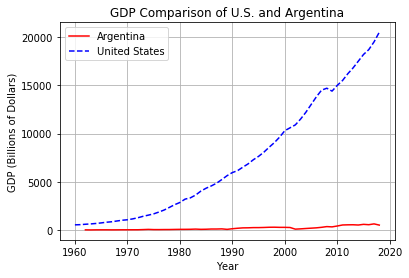

In [116]:
# Put your plotting commands here
plt.plot(dataGDP.index, dataGDP['Argentina']/1e9, "r-", label = 'Argentina')
plt.plot(dataGDP.index, dataGDP['United States']/1e9, "b--", label = 'United States')

plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP (Billions of Dollars)')
plt.title('GDP Comparison of U.S. and Argentina')


**Is this a good way to compare visually for the two countries? If one country has a much larger GDP or population than the other country what would be a better way to normalize or compare the data?**


<font size=20px>&#9998;</font> Not really. Compare the GDP per capita instead of just GDP to get a more normalized value of economic wealth. GDP is directly proportional to population and normalizing GDP with respect to population would provide a clearer picture.

---

---

### Analyzing growth rates

**One way to compare GDP between different countries in a way that is unit free would be to consider the countries _growth rates_. The growth rate for a year would be equal to the percent change going from one year to another.**

Growth Rate in 1961 = (GDP in year 1961 - GDP in year 1960) / GDP in year 1960

**Lets plot two countries growth rates on the same plot over time making sure to properly label our graph.**

(Pandas might have a function that can compute the percent change for you -- time to consult the internet again!)

**Try using the Pandas plotting functions for this part: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html**



Text(0.5, 1.0, 'GDP Growth Rate Comparison of U.S. and Argentina')

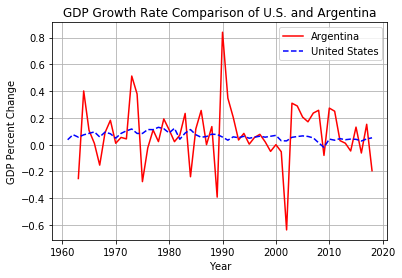

In [119]:
# Calculate and plot the growth rates as a function of time
dataGDP_pctChange = dataGDP.pct_change()
plt.plot(dataGDP_pctChange.index, dataGDP_pctChange['Argentina'], "r-", label = 'Argentina')
plt.plot(dataGDP_pctChange.index, dataGDP_pctChange['United States'], "b--", label = 'United States')

plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP Percent Change')
plt.title('GDP Growth Rate Comparison of U.S. and Argentina')


**Why is comparing growth rates a better comparison for countries that have GDP's of very different magnitudes?**


<font size=20px>&#9998;</font> It better showcases if a country is experiencing economic growth at that time, remaining stagnant, or decreasing in economic growth. Although a country may be more massive, comparing its percent change may reveal economic decay even though with comparison with a smaller country it would still have a larger GDP.

---

### Data Manipulation: Filtering and sorting

**Filter the top 10% countries by GDP in 2018, print their names, and store the names in a list in ordered by their GDP ranking.**

(Hint Pandas has a `quantile` function that could be useful to find the 10% cut off as well as a function for sorting the values)

**Make sure the names make sense, there might be an entry that doesn't belong and skews your data. If there is a non country entry in the dataset remove that row!**

In [159]:
# Put your code for finding the countries with the highest 10 GDP values and sorting them here
cutoffGDP = dataGDP.loc[2018].quantile(0.9)

highGDP = dataGDP.loc[2018][ dataGDP.loc[2018] >= cutoffGDP ]

highGDP = highGDP.drop('World')
highGDP = highGDP.drop('South Asia')

highGDP = highGDP.sort_values(ascending = False)

topTenList = highGDP.index

print(topTenList)

Index(['United States', 'China', 'Japan', 'Germany', 'United Kingdom',
       'France', 'India', 'Italy', 'Brazil', 'Canada', 'Russian Federation',
       'Korea, Rep.', 'Spain', 'Australia', 'Mexico', 'Indonesia',
       'Netherlands'],
      dtype='object', name='Country Name')


**Let's take a closer look at how the countries rank by plotting a horizontal bar graph of the top 10% countries GDP in billions by ranking order starting with the highest GDP down.**

Pandas has horizontal bar graph function as well -- isn't Pandas handy?

Text(0.5, 0, 'GDP')

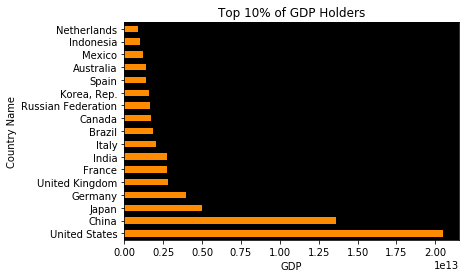

In [179]:
# Make your horizonal bar graph here
plot = highGDP.plot.barh(color = 'darkorange')
plot.set_facecolor('black')
plot.set_title('Top 10% of GDP Holders')
plot.set_xlabel('GDP')



**Using that list of the top 10% of countries, create a subset GDP dataframe that has data for only the last 20 years for countries in your list of top 10%.**

We can create a subset by setting a new variable to equal the subset of the Dataframe. 

(something like: Subset = DataFrame['Col_1'])

Then, **calculate the standard deviation of GDP for each country in the subset dataframe over the last 20 years. Recreate the Horizontal Bargraph above with but using the standard deviation.**

Text(0.5, 0, 'GDP STDev')

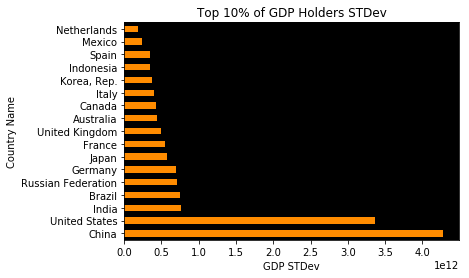

In [186]:
# Put your code here and create additional code cells as needed
subset = dataGDP[topTenList].loc[1998:2018]

subsetSTD = subset.std()
subsetSTD = subsetSTD.sort_values(ascending = False)

plot = subsetSTD.plot.barh(color = 'darkorange')
plot.set_facecolor('black')
plot.set_title('Top 10% of GDP Holders STDev')
plot.set_xlabel('GDP STDev')

**Are there similiarities between the GDP graph and the standard deviation graph? Explain why you think they look similiar and what the limitation is with using standard deviation to compare the variation of the GDP for different contries.**

<font size=20px>&#9998;</font> Countries with a higher GDP have greater distributions of their GDP. Again, those with a larger GDP will have larger fluctuations as their base GDP is much greater.

**Think about the following example:**

In [188]:
X = np.array([2,4,10,15,30,50])
print(np.std(X))

X2 = X*50
print(np.std(X2))

16.79037422652237
839.5187113261185


The idea here is the spread between the numbers in the datasets `X` & `X2` are the same in when considered as a percentage of the total, but the standard deviation will be proportionally higher for `X2`. This means the difference between each observation and the mean from a percentage basis is the same, but because the values in `X2` are 50 times larger, the standard deviation will be 50 times larger.

The take away is if we want to compare how much a countries GDP growth varies relative to another country, we want an apples to apples comparison. Taking the standard deviation of the United States compared to Thailand we would expect United States to have a higher standard deviation because the US GDP is much higher. When in reality Thailands GDP varies relatively more than the United States GDP varies.


---

**In order to compare the variation in GDP by countries of different magnitudes we want to be looking at the change in GDP from a percentage view.**

**Recreate the horizontal bar graph again now taking the standard deviation of the percent changes of growth rates of GDP for the last 20 years.**

Text(0.5, 0, 'Percent Change STDev')

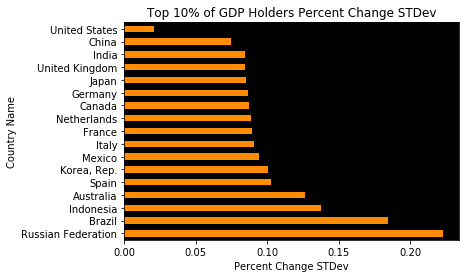

In [192]:
# Put your code here and create additional code cells as needed
subset = dataGDP[topTenList].loc[1998:2018]

subsetSTD = subset.pct_change().std()

subsetSTD = subsetSTD.sort_values(ascending = False)

plot = subsetSTD.plot.barh(color = 'darkorange')
plot.set_facecolor('black')
plot.set_title('Top 10% of GDP Holders Percent Change STDev')
plot.set_xlabel('Percent Change STDev')


**What do you observe? Why is taking the standard deviation of growth rates a better assesment of volatility than standard deviation of normal GDP for this data?**



<font size=20px>&#9998;</font> That the largest GDP holders tend to have the lowest STD in their growth rate. Looking at just growth rate STD factors out population and the massiveness of a country's GDP.

---
# Using data to explore questions (time permitting) 


**A well studied idea in economics is that high income countries have lower growth rates relative to low income developing countries. We are going to explore that idea with our data set and try to refute or prove that idea empirically.**

Empirical Study: https://resources.saylor.org/wwwresources/archived/site/wp-content/uploads/2013/03/ECON104-1.3-EconomicGrowthRates.pdf

**Below are two lists of High Income Countries and Low Income Developing Countries. Your task is to come up with a way to test on average whether or not the high income countries have higher or lower economic growth than the lower income countries over the last 10 years *only*. Make a graph that clearly displays your results and either prove or refute the above claim.**

There are multiple ways you could approach this task, so work with your team members to create a plan to tackle this question.

In [ ]:
High_Income_Country_Names = [
'United States',
'Japan',
'Germany',
'United Kingdom',
'France',
'Italy',
'Spain',
'Argentina',
'Poland',
'Canada',
'Saudi Arabia',
'Australia',
'Chile',
'Netherlands',
'Belgium',
'Czech Republic',
'Portugal',
'Sweden',
'United Arab Emirates',
'Hungary',
'Austria',
'Switzerland',
'Israel',
'Hong Kong SAR, China',
'Singapore',
'Denmark']

In [ ]:
Developing_Countries = [
'Palau',
'Panama',
'Argentina',
'Romania',
'Costa Rica',
'Malaysia',
'Turkey',
'Mauritius',
'Grenada',
'China',
'Brazil',
'Kazakhstan',
'Mexico',
'Bulgaria',
'Maldives',
'Montenegro',
'Botswana',
'Gabon',
'Lebanon',
'Cuba',
'Dominican Republic',
'Turkmenistan',
'Peru',
'Dominica',
'Thailand',
'Libya',
'Colombia']

In [ ]:
# Put your code here


### Share your results with an instructor

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2019,  Michigan State University Board of Trustees